In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Linearly Separable Data with 2 classes and build a Logistic regression model

In [2]:
from sklearn.datasets import make_blobs

<AxesSubplot: xlabel='Feature-1', ylabel='Feature-2'>

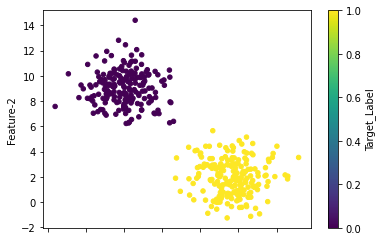

In [16]:
data= make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=1.4, center_box=(-10.0, 10.0), random_state=42)
x = pd.DataFrame(data[0], columns=['Feature-1', 'Feature-2'])
y = pd.DataFrame(data[1], columns=['Target_Label'])
df = pd.concat([x,y], ignore_index=True, axis=1)
df.columns = ['Feature-1', 'Feature-2', 'Target_Label']
#df.head()

df.plot.scatter(x = 'Feature-1', y = 'Feature-2', c='Target_Label', colormap='viridis')

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(X_test.shape)

(320, 2)
(80, 2)


In [21]:
print(y_train.value_counts(), y_test.value_counts())

Target_Label
0               160
1               160
dtype: int64 Target_Label
0               40
1               40
dtype: int64


In [23]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(random_state=1234, max_iter=2500, penalty=None, solver='saga')
model.fit(X_train, y_train['Target_Label'])

model.intercept_, model.coef_

(array([2.59143021]), array([[ 5.56242988, -1.53356788]]))

In [29]:
y_pred = model.predict(X_test)

In [32]:
print(y_test[:5])
print(y_pred[:5])

     Target_Label
92              1
88              1
319             1
105             0
205             0
[1 1 1 0 0]


In [33]:
theta0 = model.intercept_[0]
theta1 = model.coef_[0][0]
theta2 = model.coef_[0][1]

m = - (theta1/theta2)
c = - (theta0/theta2)


print("Slope = ", m, "\nIntercept = ", c)

Slope =  3.6271168495841515 
Intercept =  1.68980470727216


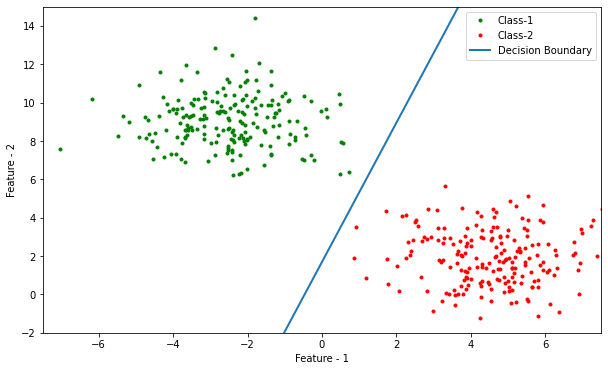

In [40]:
x1 = np.arange(-8, 8, 0.2)
x2  = m * x1 + c

plt.figure(figsize=(10,6))
plt.plot(df['Feature-1'][df['Target_Label']==0], df['Feature-2'][df['Target_Label']==0],'g.')
plt.plot(df['Feature-1'][df['Target_Label']==1], df['Feature-2'][df['Target_Label']==1],'r.')
plt.plot(x1,x2, linewidth = '2')
plt.xlabel('Feature - 1')
plt.ylabel('Feature - 2')
plt.legend(["Class-1", "Class-2","Decision Boundary"])
plt.axis([-7.5, 7.5, -2, 15])
plt.show()

In [41]:
model.predict_proba(X_test[:5])

array([[1.03514849e-07, 9.99999896e-01],
       [6.17187006e-08, 9.99999938e-01],
       [6.48354703e-11, 1.00000000e+00],
       [1.00000000e+00, 2.05429597e-15],
       [1.00000000e+00, 2.82807275e-17]])

## Generate Linearly Non-Seperable data and train the logistic regression model

<AxesSubplot: xlabel='Feature-1', ylabel='Feature-2'>

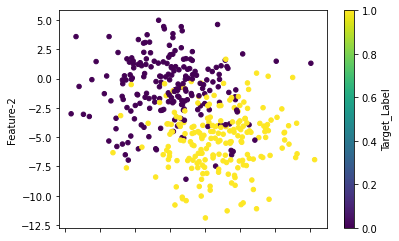

In [49]:
data= make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=2.7, center_box=(-10.0, 10.0), random_state=33)
x = pd.DataFrame(data[0], columns=['Feature-1', 'Feature-2'])
y = pd.DataFrame(data[1], columns=['Target_Label'])
df = pd.concat([x,y], ignore_index=True, axis=1)
df.columns = ['Feature-1', 'Feature-2', 'Target_Label']
#df.head()

df.plot.scatter(x = 'Feature-1', y = 'Feature-2', c='Target_Label', colormap='viridis')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts(), y_test.value_counts())

(320, 2)
(80, 2)
Target_Label
0               164
1               156
dtype: int64 Target_Label
1               44
0               36
dtype: int64


In [68]:
model = LogisticRegression(random_state=1234, max_iter=2500, penalty=None, solver='saga')
model.fit(X_train, y_train['Target_Label'])

model.intercept_, model.coef_

(array([-0.7169414]), array([[ 0.45002043, -0.68766855]]))

In [69]:
theta0 = model.intercept_[0]
theta1 = model.coef_[0][0]
theta2 = model.coef_[0][1]

m = - (theta1/theta2)
c = - (theta0/theta2)


print("Slope = ", m, "\nIntercept = ", c)

Slope =  0.6544147254357965 
Intercept =  -1.0425682582472038


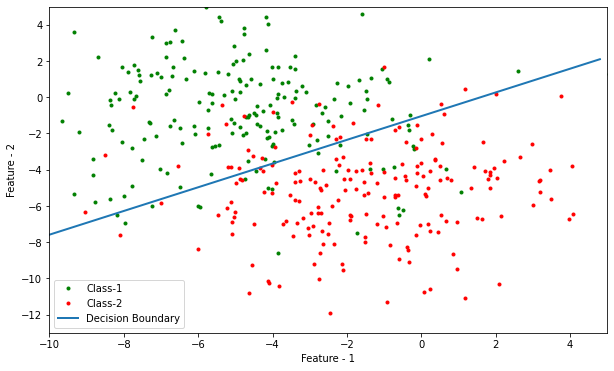

In [70]:
x1 = np.arange(-10, 5, 0.2)
x2  = m * x1 + c

plt.figure(figsize=(10,6))
plt.plot(df['Feature-1'][df['Target_Label']==0], df['Feature-2'][df['Target_Label']==0],'g.')
plt.plot(df['Feature-1'][df['Target_Label']==1], df['Feature-2'][df['Target_Label']==1],'r.')
plt.plot(x1,x2, linewidth = '2')
plt.xlabel('Feature - 1')
plt.ylabel('Feature - 2')
plt.legend(["Class-1", "Class-2","Decision Boundary"])
plt.axis([-10, 5, -13, 5])
plt.show()

## Evaluate the performace

In [71]:
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[30  6]
 [ 7 37]]


In [74]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(y_test, y_pred,average=None))
print(recall_score(y_test, y_pred, average=None))

[0.81081081 0.86046512]
[0.83333333 0.84090909]


In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
#(30 + 37) / (30+ 6 + 7 + 37)

0.8375


[0.         0.16666667 1.        ] [0.         0.84090909 1.        ] [inf  1.  0.]


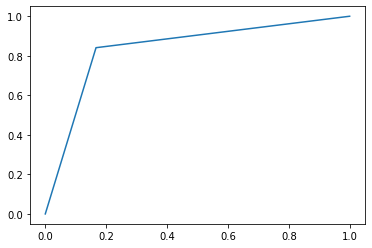

In [78]:
from sklearn.metrics import roc_curve
fpr, tpr, th = roc_curve(y_test, y_pred)
print(fpr, tpr, th)
plt.plot(fpr,tpr)
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.8371212121212122


## Regularization with Logistic regression

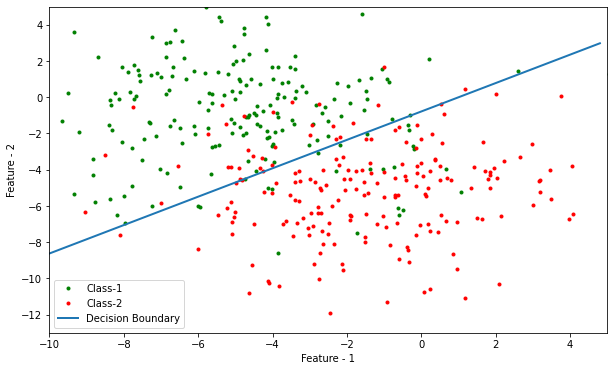

In [67]:
model = LogisticRegression(random_state=1234, max_iter=2500, penalty='l2', solver='saga', C=0.001)
model.fit(X_train, y_train['Target_Label'])

theta0 = model.intercept_[0]
theta1 = model.coef_[0][0]
theta2 = model.coef_[0][1]

m = - (theta1/theta2)
c = - (theta0/theta2)

x1 = np.arange(-10, 5, 0.2)
x2  = m * x1 + c

plt.figure(figsize=(10,6))
plt.plot(df['Feature-1'][df['Target_Label']==0], df['Feature-2'][df['Target_Label']==0],'g.')
plt.plot(df['Feature-1'][df['Target_Label']==1], df['Feature-2'][df['Target_Label']==1],'r.')
plt.plot(x1,x2, linewidth = '2')
plt.xlabel('Feature - 1')
plt.ylabel('Feature - 2')
plt.legend(["Class-1", "Class-2","Decision Boundary"])
plt.axis([-10, 5, -13, 5])
plt.show()